In [63]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [3]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [51]:
x_train_ = x_train.reshape(len(x_train),28*28)
x_test_ = x_test.reshape(len(x_test),28*28)

In [5]:
model = keras.Sequential([keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

In [48]:
x_train_ = x_train_/255
x_test_ = x_test/255

In [7]:
model.fit(x_train_,y_train,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4691 - accuracy: 0.8782
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3035 - accuracy: 0.9154
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2833 - accuracy: 0.9209
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2727 - accuracy: 0.9243
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2663 - accuracy: 0.9261
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2621 - accuracy: 0.9270
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2584 - accuracy: 0.9285
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2553 - accuracy: 0.9293
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2529 - accuracy: 0.9298
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.251

In [10]:
model.evaluate(x_test_,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 59.5711 - accuracy: 0.8957


[59.57113265991211, 0.8956999778747559]

In [11]:
y_predicted = model.predict(x_test_)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([0., 0., 0., 1., 0., 0., 0., 1., 0., 1.], dtype=float32)

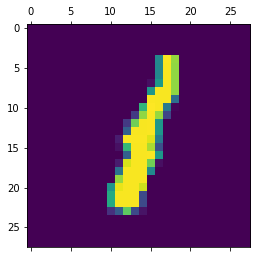

In [24]:
plt.matshow(x_test[89])

In [17]:
np.argmax(y_predicted[89])

1

In [20]:
model = keras.Sequential([
                         keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
                         keras.layers.Dense(10, activation = 'sigmoid')
                         ])
                        

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

In [49]:
model.fit(x_train_,y_train,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4289 - accuracy: 0.8716
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1511 - accuracy: 0.9566
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1122 - accuracy: 0.9667
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0863 - accuracy: 0.9746
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0689 - accuracy: 0.9793
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0545 - accuracy: 0.9831
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0448 - accuracy: 0.9860
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0372 - accuracy: 0.9886
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0316 - accuracy: 0.9904
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.026

In [52]:
model.evaluate(x_test_,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 19.1106 - accuracy: 0.9722


[19.11060905456543, 0.9721999764442444]

In [53]:
y_predicted = model.predict(x_test_)
y_predicted[0]

313/313 [==============================] - 1s 3ms/step


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

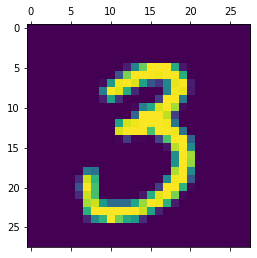

In [60]:
plt.matshow(x_test[90])

In [61]:
np.argmax(y_predicted[90])

3

313/313 [==============================] - 1s 3ms/step


Text(69.0, 0.5, 'Reality')

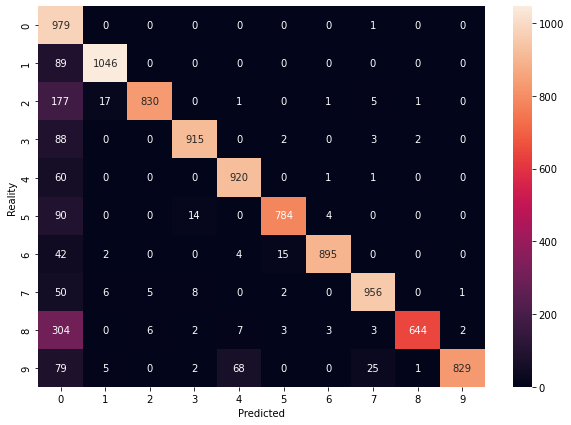

In [66]:
y_predicted = model.predict(x_test_)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)


plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Reality')